In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test.shape
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
n = train.select_dtypes('object')
n.shape

(1460, 43)

In [5]:
train = train.drop(['Id'],axis=1)
test = test.drop(['Id'],axis=1)

In [6]:
test.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


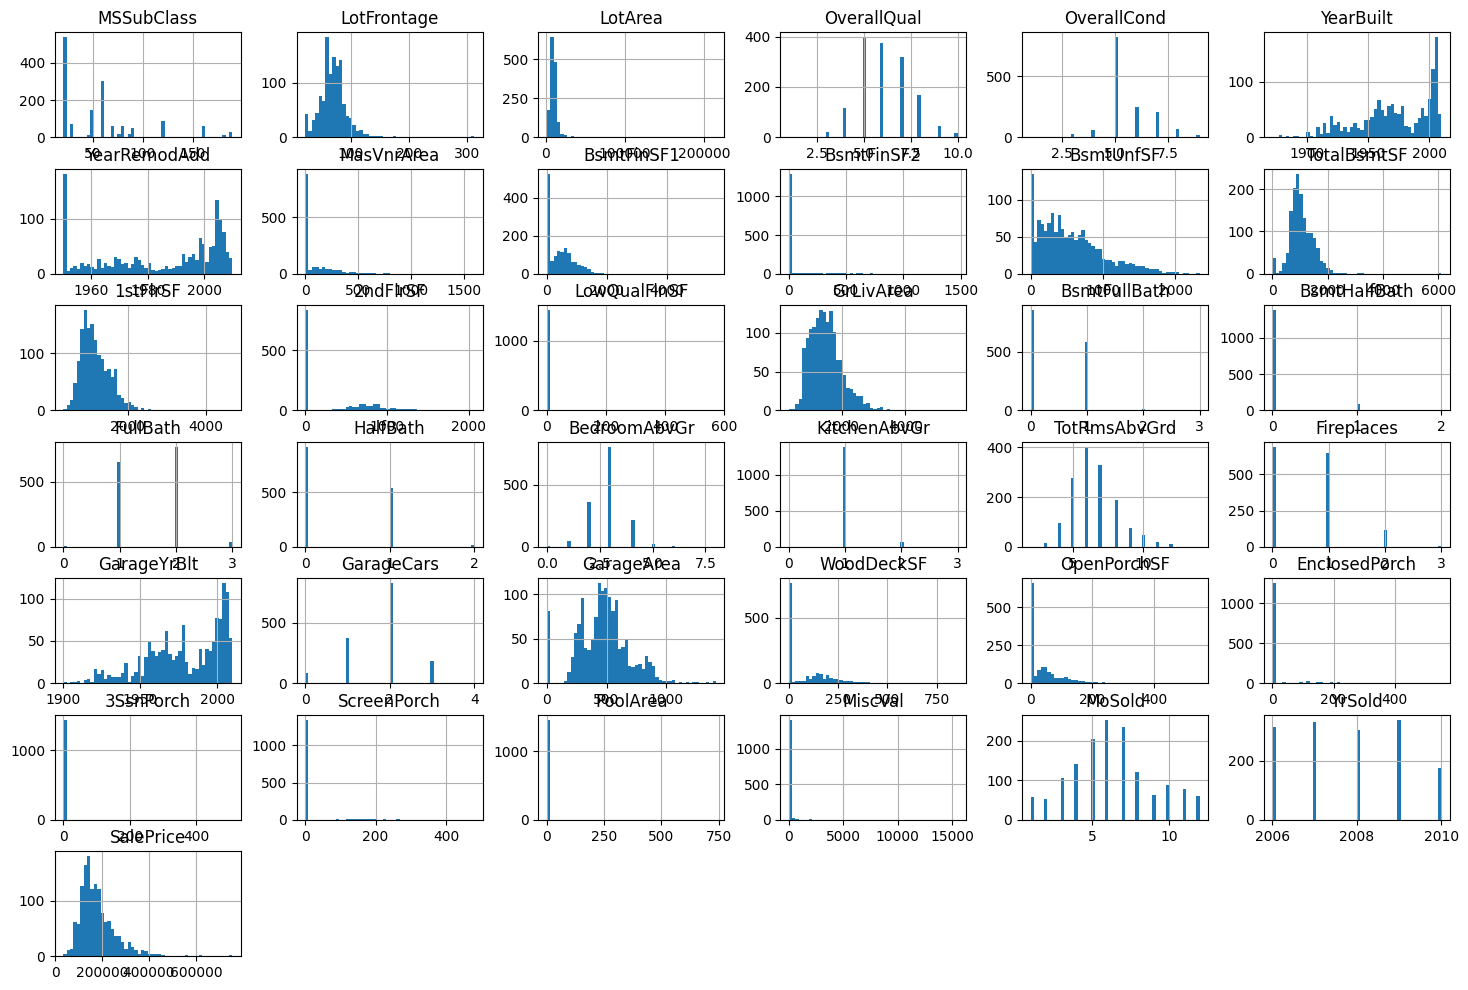

In [7]:
train.hist(bins=50, figsize=(18,12))
plt.show()

In [8]:
lb = LabelEncoder()
ob_col = train.select_dtypes(include=['object']).columns
for col in ob_col:
    train[col] = lb.fit_transform(train[col])
    test[col] = lb.fit_transform(test[col])
train['SaleType'].value_counts()


SaleType
8    1267
6     122
0      43
3       9
4       5
5       5
1       4
7       3
2       2
Name: count, dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   Alley          1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   int64  
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   int64  
 5   Alley          1459 non-null   int64  
 6   LotShape       1459 non-null   int64  
 7   LandContour    1459 non-null   int64  
 8   Utilities      1459 non-null   int64  
 9   LotConfig      1459 non-null   int64  
 10  LandSlope      1459 non-null   int64  
 11  Neighborhood   1459 non-null   int64  
 12  Condition1     1459 non-null   int64  
 13  Condition2     1459 non-null   int64  
 14  BldgType       1459 non-null   int64  
 15  HouseStyle     1459 non-null   int64  
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [11]:
target = train['SalePrice']
train = train.drop(['SalePrice'],axis=1)

In [12]:
target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler
num_1 = train.select_dtypes(include=['number']).columns 
num_2 = test.select_dtypes(include=['number']).columns 
scaler = StandardScaler()
train[num_1] = scaler.fit_transform(train[num_1])
test[num_1] = scaler.transform(test[num_1])

In [14]:
train = np.array(train)

In [15]:
train.shape

(1460, 79)

In [16]:
target = np.array(target).reshape(-1,1)
target.shape

(1460, 1)

In [17]:
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# lr.fit(train,target)
train = np.nan_to_num(train,nan=0.0)

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train,target)

LinearRegression()

In [19]:
test = np.array(test)

In [20]:
test = np.nan_to_num(test,nan=0.0)

In [21]:
pred = lr.predict(test)

In [22]:
pred

array([[188551.92293527],
       [238587.33560263],
       [249648.21607844],
       ...,
       [230802.69449823],
       [204180.46411359],
       [321332.7335026 ]])

In [23]:
final = pd.DataFrame(pred)
final.columns = ['SalePrice']
final.insert(0,'Id',list(range(1461,2920)))
final

,Id,SalePrice
0,1461,188551.922935
1,1462,238587.335603
2,1463,249648.216078
3,1464,263146.652799
4,1465,270891.966464
...,...,...
1454,2915,156241.890038
1455,2916,142928.729338
1456,2917,230802.694498
1457,2918,204180.464114


In [24]:
path = '/kaggle/working/result.csv'
final.to_csv(path,index=False)